# Week 8 Notes

## 8.1 [Fashion classification](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/08-deep-learning/01-fashion-classification.md)

This week our data will be images rather than tabular data. The images are of clothing and the objective is to classify the images into one of 10 categories (multi-class classification).

A user can for example upload a picture to a website to sell clothing. Then there is a service which will suggest a category to the user. The classification service will use a neural network.

For training neural networks, we will use Tensorflow and Keras. For further theoretical understanding, checkout [cs231n](htts://cs231n.github.io).

## 8.1b [Setting up the Environment on Saturn Cloud](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/08-deep-learning/01b-saturn-cloud.md)


Set up Saturn Cloud with Github. Instead of using my general github SSH key, I created a specific one for my ml-zoomcamp repository.

Steps I followed:
1. Generate a new SSH key pair
1. Added public key to Github (in the settings of the repository, not account-level settings)
1. Associate the key with the repository by adding this to `~/.ssh/config`
    ```bash
    Host github-my-repo
    HostName github.com
    User git
    IdentityFile ~/.ssh/my-repo-key
    ```
1. Add private key to Saturn om (same as course instruction)

I ran into an error in Saturn terminal when I tried to verify my SSH connection or when I did `SSH -V`:

```
Saturn Cloud: OpenSSL version mismatch. Built against 30000020, you have 30300020
```

This error occurs because the OpenSSH client is built against a specific version of OpenSSL (e.g., 3.0.0), but the system tries to use a different version (e.g., 3.0.3). This mismatch prevents the SSH client from working properly.

Solution:
Set the correct OpenSSL library path by running the following line in the terminal:
```bash
export LD_LIBRARY_PATH=/usr/lib/x86_64-linux-gnu
```


## 8.2 [TensorFlow and Keras](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/08-deep-learning/02-tensorflow-keras.md)


In [1]:
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import load_img

2024-11-29 07:19:46.638818: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-29 07:19:46.655247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-29 07:19:46.671460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-29 07:19:46.676099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 07:19:46.689778: I tensorflow/core/platform/cpu_feature_guar

In [3]:
path = "./clothing-dataset-small/train/t-shirt/"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"

In [4]:
fullname = f"{path}/{name}"

In [5]:
img = load_img(fullname, target_size=(299, 299))


In [6]:
x = np.array(img)

## 8.3 [Pre-Trained Convolutional Neural Networks](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/08-deep-learning/03-pretrained-models.md)

We will use an off-the-shelf neural network. These are available in Keras.

In [7]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
model = Xception(
    # include_top=True,
    weights="imagenet",
    # input_tensor=None,
    input_shape=(299, 299, 3),
    # pooling=None,
    # classes=1000,
    # classifier_activation="softmax",
)

I0000 00:00:1732864838.695094     557 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732864838.740838     557 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732864838.741075     557 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732864838.742014     557 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

`x` is a single image. `X` are multiple images.

In [9]:
X = np.array([x])

In [10]:
X.shape

(1, 299, 299, 3)

We will first infer with the model without preprocessing the image. This gives bogus results as shown below.

In [11]:
model.predict(X)

I0000 00:00:1732864845.796917    1042 service.cc:146] XLA service 0x7fdfb4003040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732864845.796947    1042 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-11-29 07:20:45.832677: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-29 07:20:46.182394: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1732864848.019381    1042 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

Now, let's preprocess:

In [12]:
X = preprocess_input(X)

In [13]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

We can see the numbers are no longer ranging from 0-255, but are between -1 and 1. They have been scaled. It's important to note that when the model was trained, it was on this preprocessed data. So when we make a prediction, we need to preprocess the images. This is similar to what we did it with sklearn when scaling certain features or other preprocessing steps.

In [14]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [15]:
pred.shape

(1, 1000)

There is 1 image and 1000 classes. Each number is the probability for a given class.

In [16]:
f"Class {pred.argmax()} has the highest probability: {pred.max():.2f}"

'Class 610 has the highest probability: 0.68'

There is a utility function for this in Keras:

In [17]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196344),
  ('n02916936', 'bulletproof_vest', 0.0381399),
  ('n04370456', 'sweatshirt', 0.034324728),
  ('n03710637', 'maillot', 0.011354211),
  ('n04525038', 'velvet', 0.0018453576)]]

## 8.4 [Convolutional Neural Networks](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/08-deep-learning/04-conv-neural-nets.md)

Convolutional neural networks are mostly used for images. They contain a convolutional layer. The Xception model we used is such a convolutional neural network.

Convolutional Neural Networks (CNN) contain two types of layers:
1. Convolutional layers
2. Dense layers

### Convolutional layers

These are like filters containing many small image segments (e.g. 5x5) with lines, shapes, gradients. These small image segments are slid across our input image and the similarity is checked between the image segment and the input image. What results is a feature map, an array with a similarity score between the small image segment (i.e. filter) and a particular location of the image.
Each filter results in a feature map. This set of feature maps, can be fed to a second convolutional layer with its own filters. Typically the first layer learns simple filters, subsequent layers learn increasingly more complicated filters. How this happens is that feature maps from one layer are compared. When they have high scores in the same area, these are then combined for the next layer.

<img src="cnn.png" width=600>

The features are learned, so it is not necessary to instruct the neural network to learn certain shapes.

After the convolutional layers, there will be a vector representation of the image. This is fed into the dense layers.

### Dense layers

The dense layers take the vector representation and turn it into a prediction. If we were to do binary classification, we could for example take the vector representation, multiply each of the elements with a weight, and sum them (i.e. take the inner product). Then we feed that number into the sigmoid function and get a prediction (e.g. whether it is a t-shirt or not).

Now, if we want to do multi-class classification, we can create a model for each class. For example, one for t-shirts, one for shirts, one for dressed, and so on. Each model has its own weights. We calculate the inner products for each class. Then, instead of feeding it into a sigmoid for each class, we use the softmax function, which outputs probabilities for all classes, ensuring they sum to 1.

The naming 'dense layer' is because each element of the input is connected to each element of the output. Similar as with the convolutional layers, we can have multiple dense layers.

## 8.5 [Transfer Learning](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/08-deep-learning/05-transfer-learning.md)

In convolutional neural netweorks, the convolutional layers are generic. They require a very large number of images to come up with filters. In transfer learning, where we take a neural network and tune it for our purposes, we typically do not touch the convolutional layers. The dense layers on the other hand are more specific to the problem at hand. So we will keep the convolutional layers and train the dense layers.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [20]:
train_ds = train_gen.flow_from_directory("./clothing-dataset-small/train", target_size=(150, 150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
X, y = next(train_ds)

`X` contains the images. We have a batch of 32 images with size 150x150, 3 channels (RGB).

In [23]:
X.shape

(32, 150, 150, 3)

`y` is the label. It is one-hot encoded. In the example below, the image is of a skirt.

In [24]:
y[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

We do the same for the validation data:

In [25]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory("./clothing-dataset-small/validation", target_size=(150, 150), batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In Keras, the top refers to what comes after the vector representation (i.e. the dense layers) and bottom refers to what comes before it (i.e. convolutional layers). By setting `include_top=False`, we exclude the dense layers. 

With `base_model.trainable = False`, we say to Keras that we don't want train convolutional layers.

The base model consists of the convolutional layers.

<img src="basemodel.png" width=600>

In [26]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  

Now we want to create a new top.

In [27]:
inputs = tf.keras.Input(shape=(150, 150, 3))

base = base_model(inputs)  # we want to apply inputs to base_model and the result is called base

outputs = base

model = tf.keras.Model(inputs, outputs)  # we need to wrap a keras model around inputs and outputs

In [28]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [29]:
preds.shape

(32, 5, 5, 2048)

In [30]:
X.shape

(32, 150, 150, 3)

So we have our image which is an input with shape (150, 150, 3). It goes into the base_model and what we get out is called base. That is assigned to outputs. Then a keras model is made with inputs and outputs. Then we can use `model.predict(X)`, where `X` is a batch of 32 images.

The predictions `preds` have a strange shape (32, 5, 5, 2048). It is not a vector representation yet. We will turn base into into a vector. The way we do this is by taking the (5, 5) matrices inside `preds` and average it. This is called **two-dimensional average pooling**.

In [31]:
inputs = tf.keras.Input(shape=(150, 150, 3))

base = base_model(inputs)  # we want to apply inputs to base_model and the result is called base

vectors = tf.keras.layers.GlobalAveragePooling2D()(base)
# vectors = pooling(base)

outputs = vectors

model = tf.keras.Model(inputs, outputs)  # we need to wrap a keras model around inputs and outputs

In [32]:
model.predict(X).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 2048)

Now for each of the 32 images in the batch we have a vector of length 2048. The next step is to tune the dense layers and get a final output which will have shape (32, 10). 32 images with class prediction.

In [33]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  

inputs = tf.keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)  # we want to apply inputs to base_model and the result is called base

vectors = tf.keras.layers.GlobalAveragePooling2D()(base)

outputs = tf.keras.layers.Dense(10)(vectors)

model = tf.keras.Model(inputs, outputs)  # we need to wrap a keras model around inputs and outputs

In [34]:
model.predict(X)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([ 0.02681635,  0.22456197, -0.24789464,  0.92747885, -0.306142  ,
       -0.09458305, -1.3396821 , -0.20722556,  0.23267235,  0.05532575],
      dtype=float32)

These are the predictions for the first image. These are bogus numbers at this point, because we haven't trained the model yet. We only created the model, which will initialize with random numbers. Now we will train it. We need a couple things to do this. One is the optimizer. Another thing we need is the loss function. It's what the optimizer tries to minimize.

In [35]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

By specifying `from_logits=True`, we are using the inner product of all the parameters and weights in a layer directly, rather than using an activation function. If we specify `from_logits=False`, we'd have to specify an activation function in the output layer:
```python
outputs = tf.keras.layers.Dense(10, activation="softmax")(vectors)
```

Now we will compile the model:

In [36]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

We will fit the model on each batch of 32 images. After cycling to all batches, we will have completed one epoch.

In [92]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.5788 - loss: 1.5939 - val_accuracy: 0.7713 - val_loss: 0.7887
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8358 - loss: 0.5021 - val_accuracy: 0.7830 - val_loss: 0.7465
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9062 - loss: 0.2998 - val_accuracy: 0.7889 - val_loss: 0.8590
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9144 - loss: 0.2523 - val_accuracy: 0.7889 - val_loss: 0.9633
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9554 - loss: 0.1316 - val_accuracy: 0.8270 - val_loss: 0.7505
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9733 - loss: 0.0927 - val_accuracy: 0.8094 - val_loss: 0.8519
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9743 - loss: 0.0762 - val_accuracy: 0.8240 - val_loss: 0.8847
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9899 - loss: 0.0400 - val_accuracy: 0.8182 -

Accuracy on training is quite high, but validation not as high. This indicates overfitting.

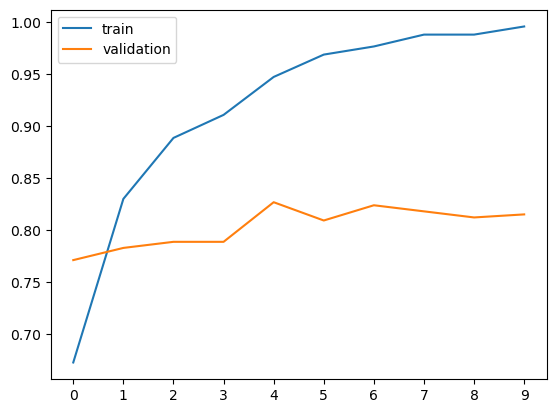

In [98]:
import matplotlib.pyplot as plt


plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xticks(range(len(history.history["accuracy"])))
plt.legend()

## 8.6 [Adjusting the Learning Rate](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/08-deep-learning/06-learning-rate.md)

Learning rate is one of the most important hyperparameters for neural network training. If learning rate is too high, training will be relatively faster, but you'll likely overfit and perform poorly on validation. if it is too low, model training will be too slow. You'll likely underfit and perform poorly on validation. If you balance the learning rate well, the model training will not take too long and perform well on the validation data.

In [37]:
def _create_architecture():
    base_model = Xception(
        weights="imagenet", 
        include_top=False, 
        input_shape=(150, 150, 3))
    
    base_model.trainable = False  
    inputs = tf.keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)  # we want to apply inputs to base_model and the result is called base
    vectors = tf.keras.layers.GlobalAveragePooling2D()(base)
    outputs = tf.keras.layers.Dense(10)(vectors)
    model = tf.keras.Model(inputs, outputs)  # we need to wrap a keras model around inputs and outputs
    
    return model

def make_model(learning_rate=0.01):
    model = _create_architecture()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=["accuracy"]
    )

    return model    

In [42]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print("\n\n")

0.001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - accuracy: 0.4708 - loss: 1.5176 - val_accuracy: 0.7889 - val_loss: 0.7233
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7718 - loss: 0.6571 - val_accuracy: 0.8035 - val_loss: 0.6508
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8311 - loss: 0.5083 - val_accuracy: 0.8123 - val_loss: 0.5854
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8585 - loss: 0.4293 - val_accuracy: 0.8299 - val_loss: 0.5490
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8828 - loss: 0.3799 - val_accuracy: 0.8123 - val_loss: 0.5650
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9043 - loss: 0.3230 - val_accuracy: 0.8123 - val_loss: 0.5563
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9344 - loss: 0.2679 - val_accuracy: 0.8211 - val_loss: 0.5492
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9415 - loss: 0.2452 - val_accuracy: 0.

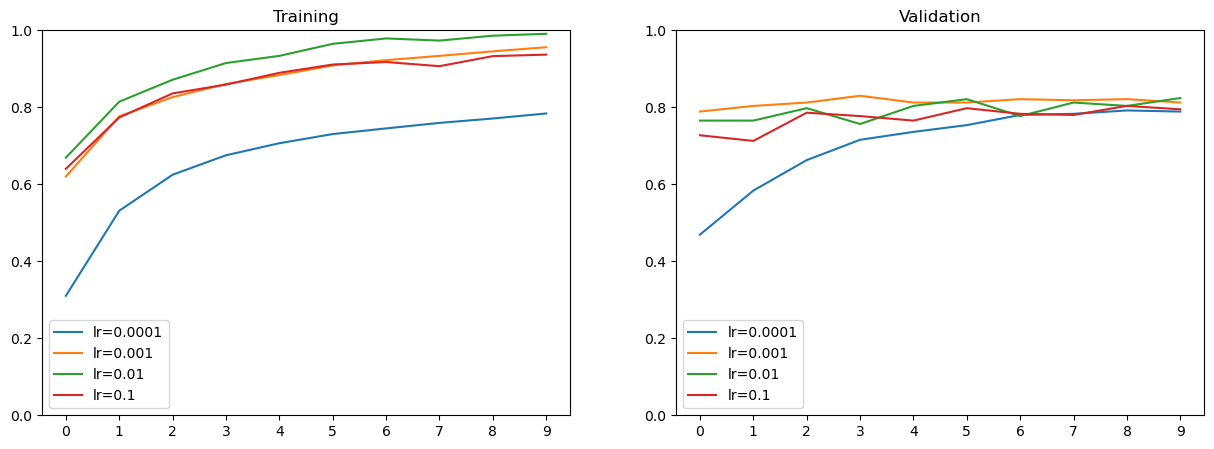

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for lr, history in scores.items():
    ax[0].plot(history["accuracy"], label=f"lr={lr}")
    ax[1].plot(history["val_accuracy"], label=f"lr={lr}")
ax[0].legend()
ax[1].legend()
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
ax[0].set_title("Training")
ax[1].set_title("Validation")
ax[0].set_xticks(np.arange(0,10));
ax[1].set_xticks(np.arange(0,10));

The validation score converges to about 0.8. The orange line (lr=0.001) performs the best. We will pick that one.